<a href="https://colab.research.google.com/github/rahiakela/genai-research-and-practice/blob/main/gemini-projects/02_gemini_pro_vision_langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [ ]:
!pip install -U --quiet langchain-google-genai  langchain

In [ ]:
!pip install pillow==10.2.0

In [ ]:
!wget https://github.com/rahiakela/genai-research-and-practice/blob/main/gemini-projects/data.zip
!unzip data.zip

In [ ]:
import os
from google.colab import userdata


os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.output_parsers import JsonOutputParser

## Simple example

In [ ]:
import requests
from IPython.display import Image

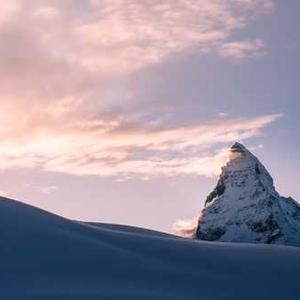

In [ ]:
image_url = "https://picsum.photos/seed/picsum/300/300"
content = requests.get(image_url).content
Image(content)

In [ ]:
llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image?",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image_url},
    ]
)

llm.invoke([message])

AIMessage(content=' A snow-capped mountain peak.')

## Invoice Image

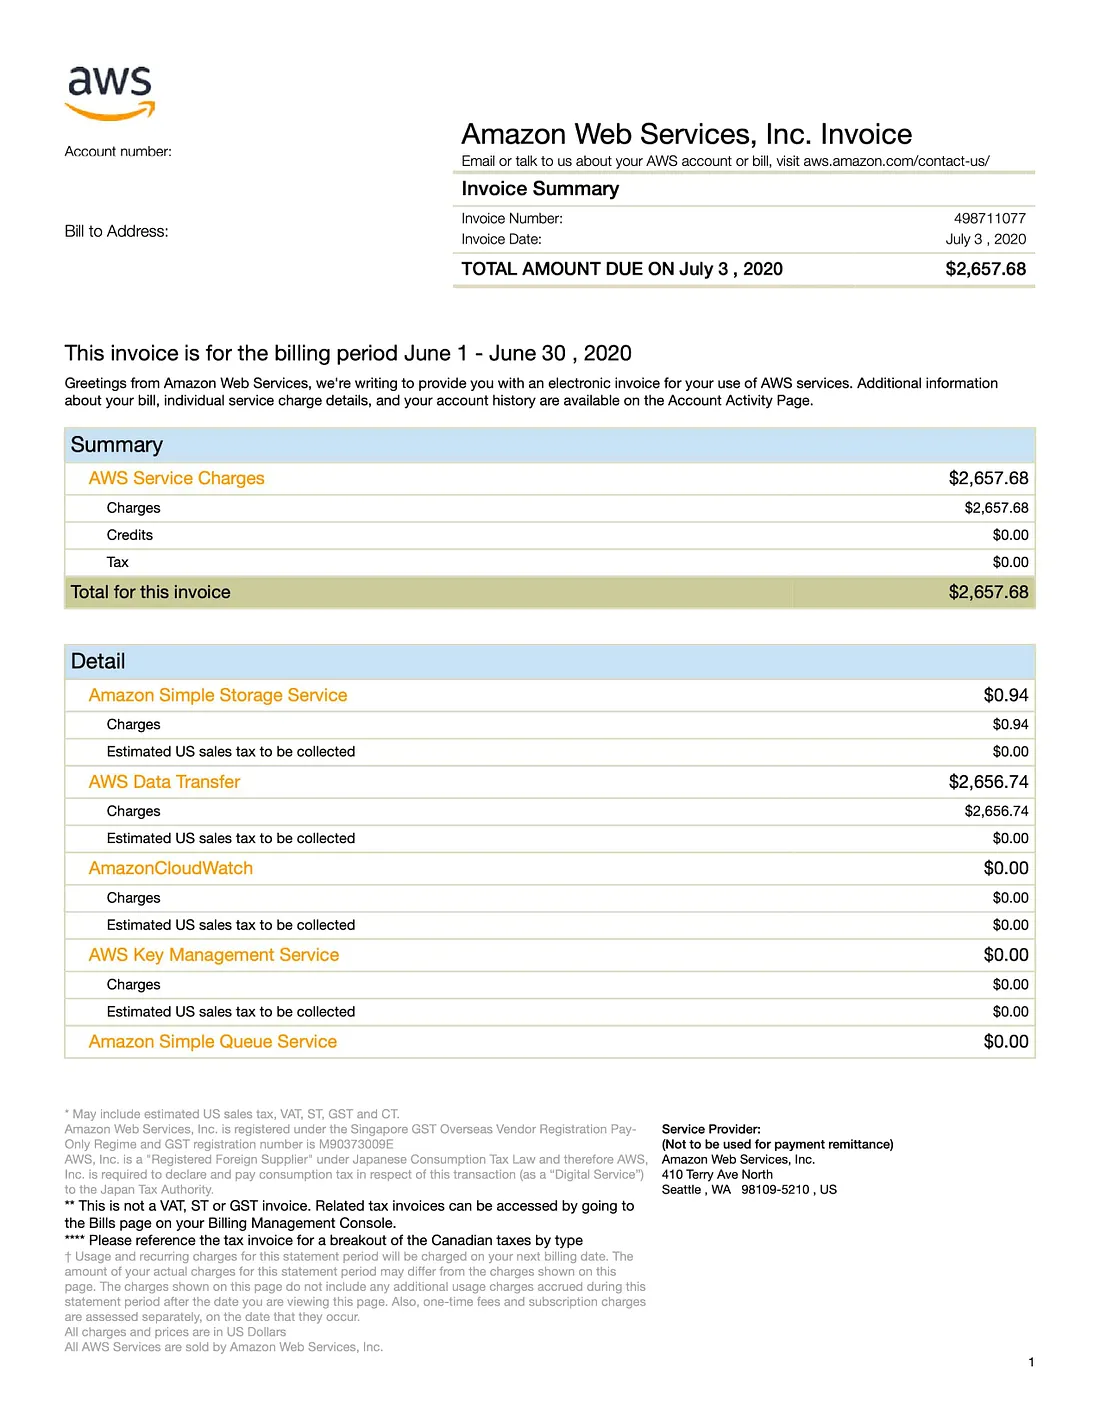

In [ ]:
from PIL import Image
from IPython.display import display
# Specify the file path
file_path = '/content/invoice498711077_redacted.jpg'

image = Image.open(file_path)

# Show the image
display(image)

In [ ]:
#create the humanmassage propmt templete with the image file
hmessage = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Convert Invoice data into json format with appropriate json tags as required for the data in image ",
        },
        {"type": "image_url", "image_url": file_path},
    ]
)

message = llm.invoke([hmessage])

print(message.content)

 ```json
{
  "Invoice Number": "498711077",
  "Invoice Date": "July 3, 2020",
  "Total Amount Due on July 3, 2020": "$2,657.68",
  "Summary": {
    "AWS Service Charges": "$2,657.68",
    "Credits": "$0.00",
    "Tax": "$0.00",
    "Total for this Invoice": "$2,657.68"
  },
  "Detail": [
    {
      "Amazon Simple Storage Service": "$0.94",
      "AWS Data Transfer": "$2,656.74",
      "AmazonCloudWatch": "$0.00",
      "Charges Estimated US sales tax to be collected": "$0.00",
      "AWS Key Management Service": "$0.00",
      "Charges Estimated US sales tax to be collected": "$0.00",
      "Amazon Simple Queue Service": "$0.00",
      "Charges Estimated US sales tax to be collected": "$0.00"
    }
  ]
}
```


## JSON Parser

In [ ]:
from langchain_core.output_parsers import JsonOutputParser

In [ ]:
parser = JsonOutputParser()


chain =  llm | parser

bill_json = chain.invoke([hmessage])

print(type(bill_json))
print(bill_json)

<class 'dict'>
{'Invoice': {'InvoiceNumber': 498711077, 'InvoiceDate': '2020-07-03', 'DueDate': '2020-07-03', 'TotalAmountDue': 2657.68, 'CustomerName': 'AWS Customer', 'CustomerAddress': {'Line1': '123 Main Street', 'Line2': 'Suite 100', 'City': 'Anytown', 'State': 'CA', 'Zip': '12345'}, 'LineItems': [{'Description': 'Amazon Simple Storage Service', 'Quantity': 1, 'UnitPrice': 0.094, 'ExtendedPrice': 0.094}, {'Description': 'AWS Data Transfer', 'Quantity': 1, 'UnitPrice': 2656.74, 'ExtendedPrice': 2656.74}, {'Description': 'AmazonCloudWatch', 'Quantity': 1, 'UnitPrice': 0.0, 'ExtendedPrice': 0.0}, {'Description': 'AWS Key Management Service', 'Quantity': 1, 'UnitPrice': 0.0, 'ExtendedPrice': 0.0}, {'Description': 'Amazon Simple Queue Service', 'Quantity': 1, 'UnitPrice': 0.0, 'ExtendedPrice': 0.0}], 'Charges': {'SubTotal': 2657.68, 'Tax': 0.0, 'Total': 2657.68}}}


# Extract Label data from image

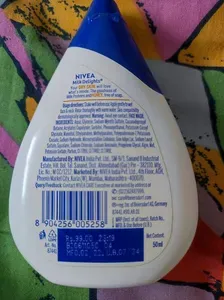

In [ ]:
from PIL import Image
from IPython.display import display
# Specify the file path
file_path = '/content/product_blur_2-thumbnail_webp-600x300.webp'

image = Image.open(file_path)

# Show the image
display(image)

In [ ]:
product_msg = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Create a json with following tags extracted from image and use information only from image for value of each tag - 'product_name','manufactured_date','expiry_date','manufactured_by','marketed_by','ingredients'",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image},
    ]
)
prod_output = llm.invoke([product_msg])

print(prod_output.content)

 ```json
{
  "product_name": "Nivea Micellar Water",
  "manufactured_date": "09.16",
  "expiry_date": "09.18",
  "manufactured_by": "Beiersdorf Manufacturing India Pvt. Ltd.",
  "marketed_by": "Nivea India Pvt. Ltd.",
  "ingredients": "Aqua, Poloxamer 124, Glycerin, Decyl Glucoside, Sodium Cocoamphoacetate, Sodium Chloride, 1-Methylhydantoin-2-Imide, Disodium Edta, Phenoxyethanol, Methylparaben, Propylparaben, Parfum"
}
```


# Ask Qusation follow up Question

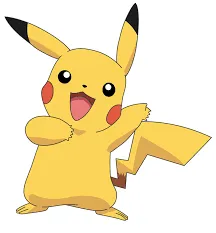

In [ ]:
from PIL import Image
from IPython.display import display
# Specify the file path
file_path = '/content/download.png'

image = Image.open(file_path)

# Show the image
display(image)

In [ ]:
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Who is this Pokemon?",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": file_path},
    ]
)
message_output = llm.invoke([message])

print(message_output.content)

 This is Pikachu, a Pokemon from the Pokemon franchise.


In [ ]:
# lets check what inside user massage
message

HumanMessage(content=[{'type': 'text', 'text': 'Who is this Pokemon?'}, {'type': 'image_url', 'image_url': '/content/download.png'}])

In [ ]:
# we can add text into content
# we will add the message into the 2nd last position
message.content.insert(-1,  {
            "type": "text",
            "text": f"{message_output.content}",
        })

In [ ]:
#
new_query = "what types of attack he knows?"

message.content.insert(-1,  {
            "type": "text",
            "text": f"{new_query}",
        })

In [ ]:
message

HumanMessage(content=[{'type': 'text', 'text': 'Who is this Pokemon?'}, {'type': 'text', 'text': ' This is Pikachu, a Pokemon from the Pokemon franchise.'}, {'type': 'text', 'text': 'what types of attack he knows?'}, {'type': 'image_url', 'image_url': '/content/download.png'}])

In [ ]:
message_output = llm.invoke([message])

print(message_output.content)

 Pikachu is an electric-type Pokemon, and it can learn a variety of electric-type attacks, such as Thunderbolt, Thunder, and Volt Tackle. It can also learn other types of attacks, such as Quick Attack, Iron Tail, and Aerial Ace.
